<a href="https://colab.research.google.com/github/artem-bezrukov/spring_2022/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Определите количество мужчин и женщин, которые ехали на корабле.

In [ ]:
import pandas as pd
import numpy as np
import statistics
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df=pd.read_csv("/content/drive/MyDrive/titanic.csv",sep =';',decimal=',');
all=df.shape[0]
male=df[df.sex=='male'].shape[0]
female=df[df.sex=='female'].shape[0]
print('male:', male,'female:', female)

Mounted at /content/drive
male: 843 female: 466


2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.

In [ ]:

Survived=df[df.survived == 1].shape[0]
surv_percent=Survived/(all/100)
print('Survived:', Survived,'Percent of survived passangers:', int(surv_percent),'%')

Survived: 500 Percent of survived passangers: 38 %


3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [ ]:
first_class=df[df.pclass == 1].shape[0]
first_class_percent=first_class/(all/100)
print('first class percent:', int(first_class_percent),'%')

first class percent: 24 %


4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [ ]:
df [['age']].head()
mean = df.age.mean()
median = df.age.median()
print("Age mean = %.1f" % mean, ", age median = %.1f" % median)

Age mean = 29.9 , age median = 28.0


5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

Correlation: 0.374


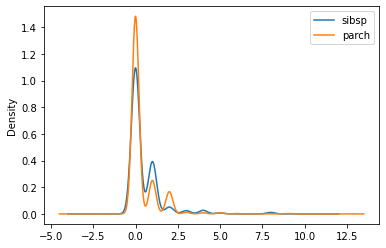

In [ ]:
sibSp = df.sibsp
parch = df.parch
corr = sibSp.corr(parch, method="pearson")
print('Correlation:', round(corr,3))

sibSp.plot.kde(legend=True)
parch.plot.kde(legend=True)

6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.


In [ ]:
def get_first_name(name):
  first_name = name.split('.')[1].strip()
  if('(' in first_name):
    first_name=first_name.split('(')[1].strip()


  else:
    first_name=first_name.split('.')[0].strip()
    return first_name
first_name=df['name'].apply(get_first_name)
df['first_name'] = first_name
df[(df['sex'] == 'female')]['first_name'].value_counts()

Mary                         7
Kate                         5
Bertha                       4
Anna Sofia                   3
Ellen "Nellie"               3
                            ..
Simonne Marie Anne Andree    1
Jessie Wills                 1
Madeleine Violet             1
Alice Frances Louisa         1
Thamine                      1
Name: first_name, Length: 232, dtype: int64

7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [ ]:
Pclass=df.pclass
Survived=df.survived
corr=Pclass.corr(Survived,method="pearson")
print('Correlation: ',round(corr,3))

Correlation:  -0.312


8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

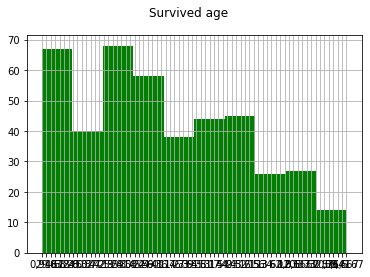

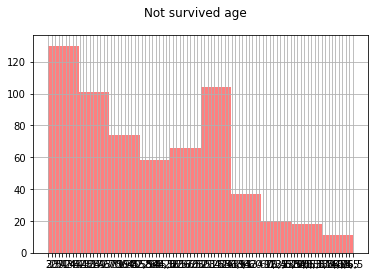

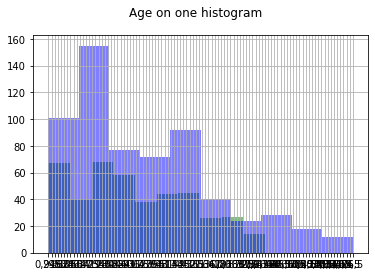

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl

survivedPeople = df["age"][df.survived == 1]
notSurvivedPeople = df["age"][df.survived == 0]


binsNumber = 10
plt.figure();
pl.suptitle("Survived age")
survivedPeople.hist(bins=binsNumber, color="g")
plt.figure();
pl.suptitle("Not survived age")
notSurvivedPeople.hist(bins=binsNumber, alpha=0.5, color="r")

plt.figure();
pl.suptitle("Age on one histogram")
survivedPeople.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvivedPeople.hist(bins=binsNumber, alpha=0.5, color="b")


9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

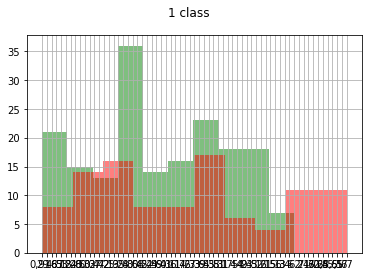

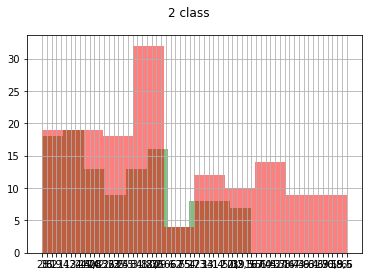

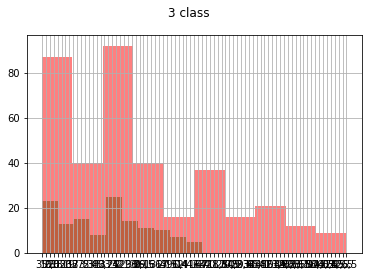

In [ ]:
binsNumber = 10
survived1 = df[(df.survived == 1) & (df.pclass == 1)]["age"]
notSurvived1 = df[(df.survived == 0) & (df.pclass == 1)]["age"]
plt.figure();
pl.suptitle("1 class")
survived1.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvived1.hist(bins=binsNumber, alpha=0.5, color="r")

survived2 = df[(df.survived == 1) & (df.pclass == 2)]["age"]
notSurvived2 = df[(df.survived == 0) & (df.pclass == 2)]["age"]
plt.figure();
pl.suptitle("2 class")
survived2.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvived2.hist(bins=binsNumber, alpha=0.5, color="r")

survived3 = df[(df.survived == 1) & (df.pclass == 3)]["age"]
notSurvived3 = df[(df.survived == 0) & (df.pclass == 3)]["age"]
plt.figure();
pl.suptitle("3 class")
survived3.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvived3.hist(bins=binsNumber, alpha=0.5, color="r")



10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<BarContainer object of 3 artists>

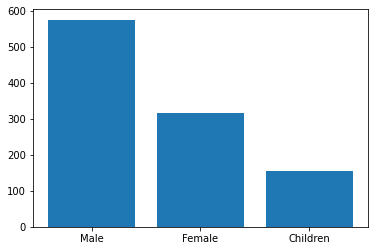

In [ ]:

male = df[(df.sex == "male") & (df.age.astype(float) >= 18)]
menNumber = male.shape[0]
female = df[(df.sex == "female") & (df.age >= 18)]
womenNumber = female.shape[0]
children = df[df.age < 18]
childrenNumber = children.shape[0]
plt.bar(["Male", "Female", "Children"], [menNumber, womenNumber, childrenNumber])

In [ ]:
df.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Series([], Name: name, dtype: int64)